# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import requests
import time

# API Keys
from api_keys import weather_api_key
temp_units = "imperial"

from citipy import citipy

# Range of lats and longs
lat_range = (-90, 90)
lng_range = (-180, 180)

weather_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="
weather_url

'http://api.openweathermap.org/data/2.5/weather?appid=17cfff41535eb07c50898cabd10d0b3e&units=imperial&q='

## Generate Cities List

In [3]:
# Empty list to hold city data
coordinates = []
city_list = []

# Pick cities by creating set of random lat and long
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000,high=180.000, size=1500)
coordinates = zip(lats,lngs)

#Find cities closest to lat,lng combination
for x in coordinates:
    city = citipy.nearest_city(x[0], x[1]).city_name
    if city not in city_list:
        city_list.append(city)
len(city_list)



611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_fordf =[]
lats_fordf =[]
lngs_fordf = []
max_temp = []
humidity =[]
cloudiness = []
wind_speed = []
country = []
date =[]

# set counts for organization

counts = 0
sets = 1

# loops for creating df

for city in city_list:
    try:
        response = requests.get(weather_url + city.replace(" ", "&")).json()
        lats_fordf.append(response["coord"]["lat"])
        lngs_fordf.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        if counts > 49:
            counts = 1
            sets += 1
            city_fordf.append(city)
        else:
            counts += 1
            city_fordf.append(city)
        print(f"Processing Record {counts} of {sets} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
        

Processing Record 1 of 1 | kruisfontein
Processing Record 2 of 1 | lorengau
Processing Record 3 of 1 | hermanus
Processing Record 4 of 1 | pingyin
Processing Record 5 of 1 | nishihara
Processing Record 6 of 1 | asyut
Processing Record 7 of 1 | victoria
Processing Record 8 of 1 | bambous virieux
Processing Record 9 of 1 | ostrovnoy
City not found. Skipping...
Processing Record 10 of 1 | busselton
Processing Record 11 of 1 | jamestown
Processing Record 12 of 1 | hilo
City not found. Skipping...
Processing Record 13 of 1 | manakara
Processing Record 14 of 1 | ribeira grande
Processing Record 15 of 1 | cabedelo
Processing Record 16 of 1 | kavieng
Processing Record 17 of 1 | carnarvon
Processing Record 18 of 1 | ushuaia
Processing Record 19 of 1 | yanliang
Processing Record 20 of 1 | acapulco
Processing Record 21 of 1 | nioro
Processing Record 22 of 1 | albany
Processing Record 23 of 1 | chiredzi
Processing Record 24 of 1 | rikitea
Processing Record 25 of 1 | new norfolk
Processing Record 2

Processing Record 1 of 5 | cabo san lucas
Processing Record 2 of 5 | naruto
Processing Record 3 of 5 | namikupa
Processing Record 4 of 5 | lages
Processing Record 5 of 5 | port blair
Processing Record 6 of 5 | vestmannaeyjar
Processing Record 7 of 5 | arraial do cabo
Processing Record 8 of 5 | saint-philippe
Processing Record 9 of 5 | oriximina
Processing Record 10 of 5 | chhatapur
Processing Record 11 of 5 | kandrian
Processing Record 12 of 5 | ocos
Processing Record 13 of 5 | fort nelson
Processing Record 14 of 5 | naberera
Processing Record 15 of 5 | severo-yeniseyskiy
Processing Record 16 of 5 | cayenne
City not found. Skipping...
Processing Record 17 of 5 | kilindoni
Processing Record 18 of 5 | clyde river
Processing Record 19 of 5 | manado
Processing Record 20 of 5 | padang
Processing Record 21 of 5 | olafsvik
Processing Record 22 of 5 | chuy
Processing Record 23 of 5 | tuktoyaktuk
Processing Record 24 of 5 | geraldton
Processing Record 25 of 5 | preobrazheniye
Processing Record 

Processing Record 10 of 9 | pokrovsk
Processing Record 11 of 9 | englewood
Processing Record 12 of 9 | ironton
Processing Record 13 of 9 | ekibastuz
Processing Record 14 of 9 | angoche
Processing Record 15 of 9 | valleyview
Processing Record 16 of 9 | arrecife
Processing Record 17 of 9 | presidente medici
Processing Record 18 of 9 | galveston
Processing Record 19 of 9 | araouane
Processing Record 20 of 9 | boa vista
Processing Record 21 of 9 | kiama
Processing Record 22 of 9 | erdenet
Processing Record 23 of 9 | sapa
Processing Record 24 of 9 | soe
Processing Record 25 of 9 | vao
Processing Record 26 of 9 | brandon
Processing Record 27 of 9 | gazanjyk
Processing Record 28 of 9 | emerald
Processing Record 29 of 9 | brasilia de minas
Processing Record 30 of 9 | bandarbeyla
Processing Record 31 of 9 | brainerd
Processing Record 32 of 9 | amga
Processing Record 33 of 9 | port macquarie
City not found. Skipping...
Processing Record 34 of 9 | akyab
Processing Record 35 of 9 | camacha
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
weather_dict = {
    "City": city_fordf,
    "Lat": lats_fordf,
    "Lng": lngs_fordf,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
    
}

In [10]:
#Create DatsFrame
weather_df = pd.DataFrame(weather_dict)
weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.00,24.73,54.30,61,0,8.37,ZA,1600026114
1,lorengau,-2.02,147.27,81.93,81,100,11.65,PG,1600026115
2,hermanus,-34.42,19.23,55.00,78,35,8.99,ZA,1600026115
3,pingyin,36.28,116.45,75.00,69,100,6.29,CN,1600026115
4,nishihara,26.18,127.76,82.40,94,40,3.36,JP,1600026116


In [11]:
weather_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [12]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,21.488318,20.965570,68.187776,69.132007,49.486438,7.502116,1.600026e+09
std,31.787228,85.993629,15.163999,22.672981,40.622024,4.914727,9.528677e+01
min,-54.800000,-175.200000,23.320000,2.000000,0.000000,0.220000,1.600026e+09
25%,-6.220000,-50.330000,57.070000,55.000000,1.000000,3.440000,1.600026e+09
50%,26.180000,25.100000,71.600000,75.000000,48.000000,6.710000,1.600026e+09
75%,47.430000,99.830000,79.020000,87.000000,90.000000,10.290000,1.600026e+09
max,78.220000,179.320000,106.920000,100.000000,100.000000,24.160000,1.600026e+09


In [19]:
output = os.path.join("..","output_data","Cities.csv")
weather_df.to_csv(output)



## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

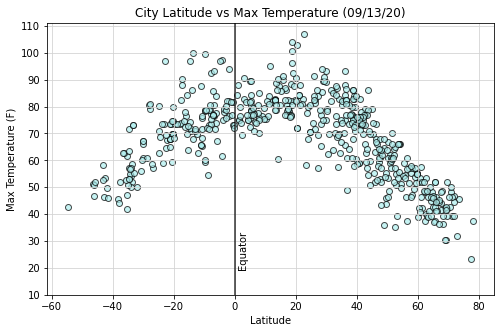

In [55]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Max Temperature (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.yticks(np.arange(10, max(weather_df["Max Temp"])*1.05, 10))
plt.savefig(os.path.join("..","output_data","lat_maxtemp.png"))


## Latitude vs. Humidity Plot

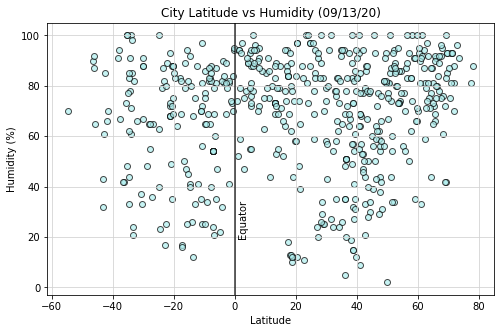

In [56]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Humidity"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Humidity (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.savefig(os.path.join("..","output_data","lat_hum.png"))

## Latitude vs. Cloudiness Plot

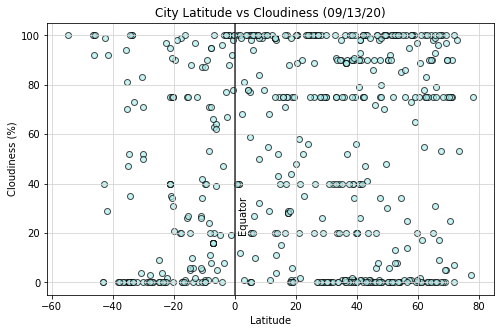

In [57]:
plt.figure(figsize = (8,5))
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], edgecolors="black", facecolors="paleturquoise", alpha=0.7)
plt.title("City Latitude vs Cloudiness (09/13/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.axvline(0, color="black", alpha=0.8)
plt.text(1,20,"Equator", rotation=90)
plt.grid(color="lightgrey")
plt.savefig(os.path.join("..","output_data","lat_hum.png"))

## Latitude vs. Wind Speed Plot

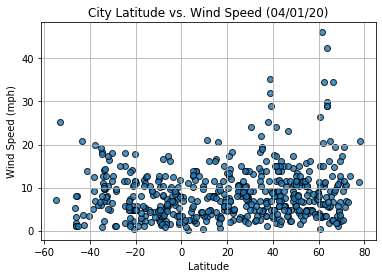

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


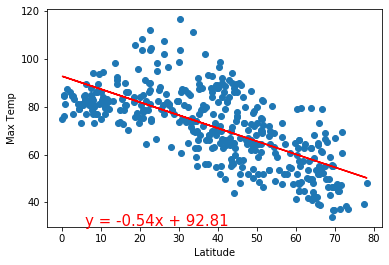

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


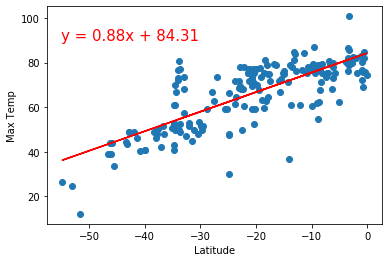

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


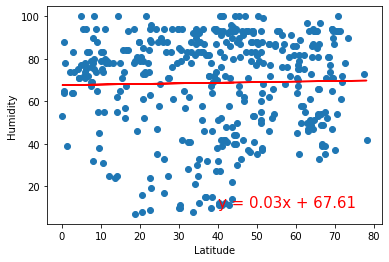

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


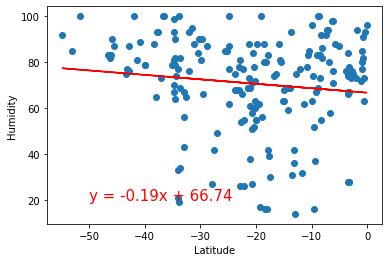

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


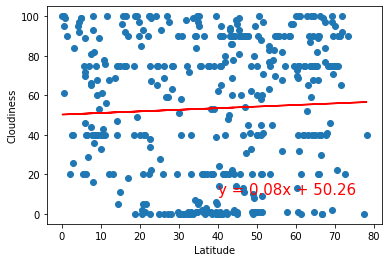

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


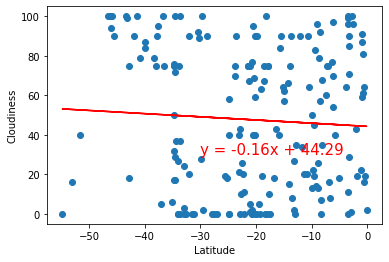

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


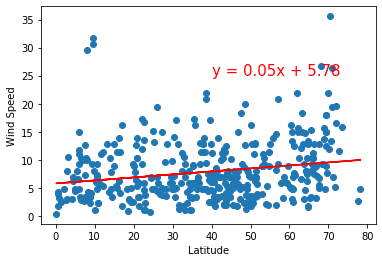

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


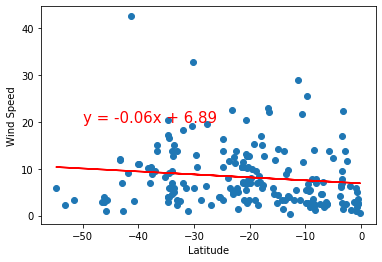